   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MEDV  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64
Coefficient (slope):v0.07675558963126741
Intercept:1.6547622685968417
Actual :0.48,predicted:1.976537094209815
Actual :0.46,predicted:2.041563125248931
Actual :5.00,predicted:1.9600311245550497
Actual :2.19,predicted:2.1278558119604716
Actual :2.78,predi

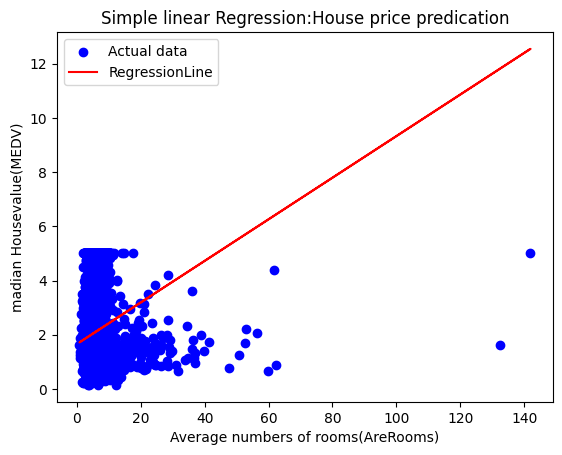

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Load the California housing dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MEDV'] = california.target  # Adding the target variable

# Display the first few rows of the dataset
print(data.head())

#Select the feature and target variable
X = data[['AveRooms']].values
y= data['MEDV'].values
#step 3 : preprocessing
#check for missing values
print(data.isnull().sum())

#spilt data into training and testing sets

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

# create the model

model = LinearRegression()

#train the model

model.fit(X_train,y_train)
#print model coefficients

print(f"Coefficient (slope):v{model.coef_[0]}")
print(f"Intercept:{model.intercept_}")

#predict on test set
y_pred=model.predict(X_test)

#display predications and actual values

for actual,predicted in zip(y_test[:5],y_pred[:5]):print(f"Actual :{actual:.2f},predicted:{predicted}")
#calculate evaluatiion metrics

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Mean squared error:{mse:.2f}")
print(f"R_squared:{r2:.2f}")

#visualize the results

plt.scatter(X,y,color='blue',label='Actual data')

#regression line
plt.plot(X,model.predict(X),color='red',label='RegressionLine')

plt.xlabel('Average numbers of rooms(AreRooms)')
plt.ylabel('madian Housevalue(MEDV)')
plt.title('Simple linear Regression:House price predication')
plt.legend()
plt.show()